In [41]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [46]:
# data recorded in 2 styles
from os import listdir
from os.path import isfile, join

datapath = './data'
txt_files = [f for f in listdir(datapath) if isfile(join(datapath, f)) and f[-4:] == '.txt']
style1 = [f for f in txt_files if f[:4] == 'data']
style2 = [f for f in txt_files if f[:3] == 'amp']
print(len(txt_files), len(style1), len(style2))
print(style1[0], style1[1])
print(style2[0])

48 25 23
data_30_08_05_3.txt data_30_08_05_3_n1.txt
amp30.000000_freq0.800000_phi-0.600000_dist5.000000_tial1.txt


In [47]:
# rename the file
from os import rename
# style 1 with n
for filename in style1:
    segs = filename[5:-4].split('_')
    amp = int(segs[0])
    freq = int(segs[1])/10.0
    phi = int(segs[2])/10.0
    dis = int(segs[3])
    if len(segs) == 4:
        trial = 0
    else:
        try:
            trial = int(segs[4])
        except:
            trial = int(segs[4][1:])
    #print(f'{amp}_{freq}_{phi}_{dis}_{trial}')
    rename(join(datapath, filename), join(datapath, f'data_{amp}_{freq}_{phi}_{dis}_0_{trial}.txt'))

# style 2
for filename in style2:
    reg_amp = r"amp\d+\.\d+"
    reg_freq = r"freq\d+\.\d+"
    reg_phi = r"phi-*\d+\.\d+"
    reg_dist = r"dist\d+\.\d+"
    reg_trial = r"tial\d+"
    reg_turn = r"turn\d+"
    amp = int(float(re.findall(reg_amp, filename)[0][3:]))
    freq = float(re.findall(reg_freq, filename)[0][4:])
    phi = float(re.findall(reg_phi, filename)[0][3:])
    dist = float(re.findall(reg_dist, filename)[0][4:])
    try:
        turn = int(re.findall(reg_turn, filename)[0][4:])
    except:
        turn = 0
    trial = int(re.findall(reg_trial, filename)[0][4:])
    rename(join(datapath, filename), join(datapath, f'data_{amp}_{freq}_{phi}_{dist}_{turn}_{trial}.txt'))

In [51]:
txt_files = [f for f in listdir(datapath) if isfile(join(datapath, f)) and f[-4:] == '.txt' and f[:4] == 'data']
print(len(txt_files))

48


In [3]:
filename = 'data/amp30.000000_freq1.000000_phi0.500000_dist30.000000_turn15_tial1.txt'
with open(filename, 'r') as file:
    file = open(filename, 'r')
    xyt = []
    traj_t = file.readlines()
regex = r"\d+\.\d+"
for ele in traj_t:
    x, y, t = re.findall(regex, ele)
    xyt.append([float(x), float(y), float(t)])
xyt = np.array(xyt)
dist = np.power((xyt - xyt[0, :]), 2)[:, :-1].sum(axis=1)

In [9]:
def plot_traj_t(filename="data/amp30.000000_freq1.000000_phi0.500000_dist30.000000_turn15_tial1.txt", params=[30, 1.0, 0.5]):
    with open(filename, 'r') as file:
        xyt = []
        traj_t = file.readlines()
    regex = r"\d+\.\d+"
    for ele in traj_t:
        x, y, t = re.findall(regex, ele)
        xyt.append([float(x), float(y), float(t)])
    xyt = np.array(xyt)
    displace = np.roll(xyt[:, :-1], 1, axis=0)
    displace[0, :] = displace[1, :]

    delta_dist = np.power(displace - xyt[:, :-1], 2).sum(axis=1)
    dist = np.cumsum(delta_dist)
    speed = dist / xyt[:, -1] * 1000
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    ax1.plot(xyt[:, 0], xyt[:, 1])

    ax1.scatter(xyt[0, 0], xyt[0, 1], color='green', label='Start')
    ax1.scatter(xyt[-1, 0], xyt[-1, 1], color='red', label='End')
    ax1.set_xlim([0, 5])
    ax1.set_ylim([0, 3])
    ax1.legend()
    ax1.set_title('Trajectory (m)')

    ax2.set_title('Average Speed (m/s)')
    ax2.plot(xyt[:, 2]/1000, speed)
    ax2.set_xlabel('Time (s)')
    plt.suptitle('$A$: {:d} $f$: {:.2f} $\phi$: {}'.format(params[0], params[1], params[2]))
    plt.savefig('A_{:d}_f_{:.2f}_phi_{}.pdf'.format(params[0], params[1], params[2]))

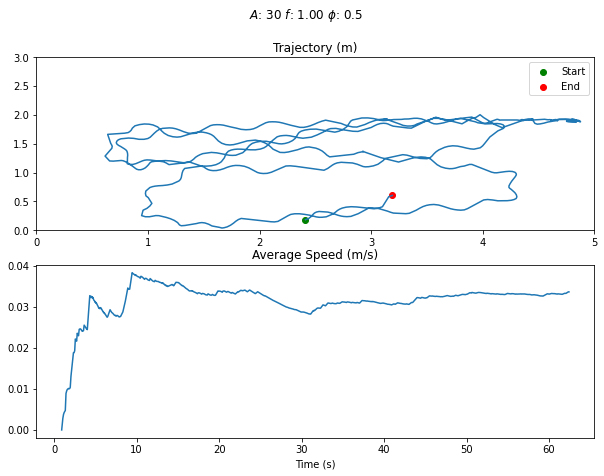

In [10]:
plot_traj_t()

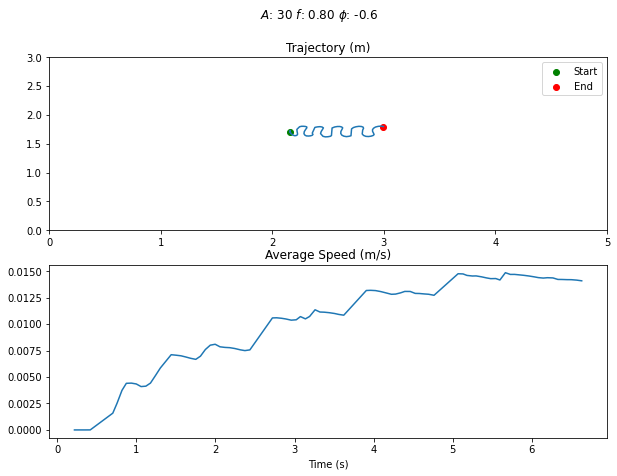

In [6]:
# Make sure the first parameter is the filename, the second is in the order of [Amplitude, frequency, phase_lag]
plot_traj_t("data/amp30.000000_freq0.800000_phi-0.600000_dist5.000000_tial1.txt", [30, 0.8, -0.6])

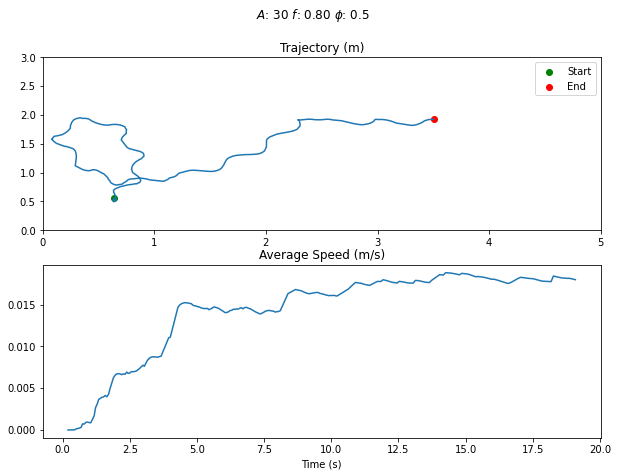

In [7]:
# Make sure the first parameter is the filename, the second is in the order of [Amplitude, frequency, phase_lag]
plot_traj_t("data/amp30.000000_freq0.800000_phi0.500000_dist20.000000_turn15_tial6.txt", [30, 0.8, 0.5])